<a href="https://colab.research.google.com/github/Lakshayakanna123/datascience_and_algorithms/blob/main/Outliers_Cleaned_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OUTLIERS

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_dataset.csv to cleaned_dataset.csv


In [ ]:
import pandas as pd

# Load the dataset

data = pd.read_csv('cleaned_dataset.csv')

# Display the first few rows of the dataset
print(data.head())

  Influencer insta name instagram name          category_1 category_2  \
0                   433            433  Sports with a ball    Unknown   
1          __youngbae__        TAEYANG               Music    Unknown   
2           _agentgirl_  НАСТЯ ИВЛЕЕВА               Shows    Unknown   
3           _imyour_joy            Joy           Lifestyle    Unknown   
4         _jeongjaehyun        Jaehyun             Unknown    Unknown   

    Followers Audience country(mostly)  Authentic engagement\r\n  \
0  48500000.0                    Spain                  383100.0   
1  12700000.0                Indonesia                  478000.0   
2  18800000.0                   Russia                  310800.0   
3  13500000.0                Indonesia                 1100000.0   
4  11100000.0                Indonesia                 2500000.0   

  Engagement avg\r\n  
0               637K  
1             542.3K  
2             377.9K  
3               1.4M  
4               3.1M  


In [ ]:
data_description = data.describe()
print(data_description)

          Followers  Authentic engagement\r\n
count  1.000000e+03              1.000000e+03
mean   2.571620e+07              6.807700e+05
std    4.102903e+07              1.190369e+06
min    2.600000e+06              0.000000e+00
25%    9.000000e+06              2.119000e+05
50%    1.455000e+07              3.715000e+05
75%    2.652500e+07              6.845000e+05
max    4.872000e+08              1.270000e+07


) missing from current font.
  plt.tight_layout()
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


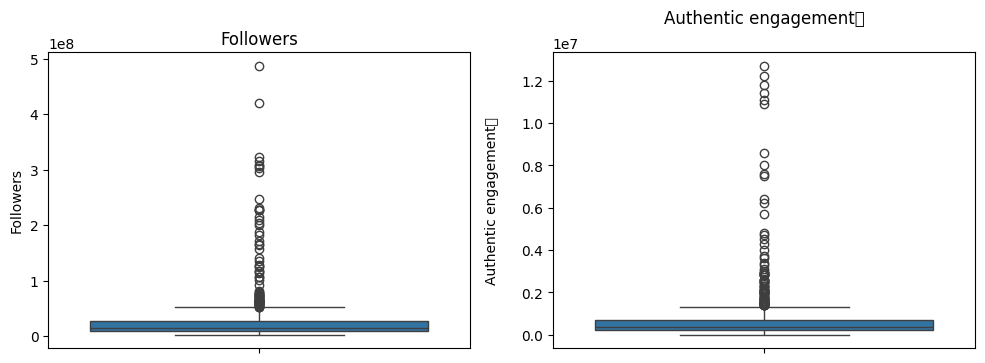

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the visualization
plt.figure(figsize=(15, 10))

# List of numerical columns to plot - replace with your actual column names!
numerical_columns = ['Followers','Authentic engagement\r\n']

# Create box plots for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


IQR

In [ ]:
# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numerical column
for column in numerical_columns:
    data = remove_outliers(data, column)

# Display the dataset after removing outliers
print(data.describe())

          Followers  Authentic engagement\r\n
count  8.390000e+02              8.390000e+02
mean   1.650846e+07              4.038629e+05
std    1.101213e+07              2.735554e+05
min    2.600000e+06              0.000000e+00
25%    8.400000e+06              1.978500e+05
50%    1.330000e+07              3.329000e+05
75%    2.145000e+07              5.407000e+05
max    5.280000e+07              1.200000e+06


In [ ]:
# Define a function to cap outliers
def cap_outliers(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

# Apply the function to each numerical column
for column in numerical_columns:
    data = cap_outliers(data, column)

# Display the dataset after capping outliers
print(data.describe())


          Followers  Authentic engagement\r\n
count  8.390000e+02              8.390000e+02
mean   1.649431e+07              4.040513e+05
std    1.095582e+07              2.732829e+05
min    3.300000e+06              1.755600e+04
25%    8.400000e+06              1.978500e+05
50%    1.330000e+07              3.329000e+05
75%    2.145000e+07              5.407000e+05
max    5.025800e+07              1.200000e+06


In [ ]:
import numpy as np

# Apply log transformation to each numerical column
for column in numerical_columns:
    data[column] = np.log1p(data[column])

# Display the dataset after transformation
print(data.describe())


        Followers  Authentic engagement\r\n
count  839.000000                839.000000
mean    16.414024                 12.661551
std      0.644394                  0.757827
min     15.009433                  9.773208
25%     15.943742                 12.195258
50%     16.403275                 12.715600
75%     16.881233                 13.200621
max     17.732680                 13.997833


z-score

In [ ]:
import pandas as pd
mean_followers = data['Followers'].mean()
std_followers = data['Followers'].std()

mean_engagement = data['Authentic engagement\r\n'].mean()
std_engagement = data['Authentic engagement\r\n'].std()

In [ ]:
data['followers_z'] = (data['Followers'] - mean_followers) / std_followers
data['engagement_z'] = (data['Authentic engagement\r\n'] - mean_engagement) / std_engagement

In [ ]:
print(data[['followers_z', 'engagement_z']])

     followers_z  engagement_z
0       1.991096      0.256658
1      -0.088318      0.548696
2       0.520401     -0.019323
3       0.006481      1.648491
5      -0.825040      1.405649
..           ...           ...
993     0.840044     -0.166017
994     0.308457     -0.784791
996     1.306506      0.724209
998    -0.767200      0.810730
999    -0.555256     -0.544839

[839 rows x 2 columns]


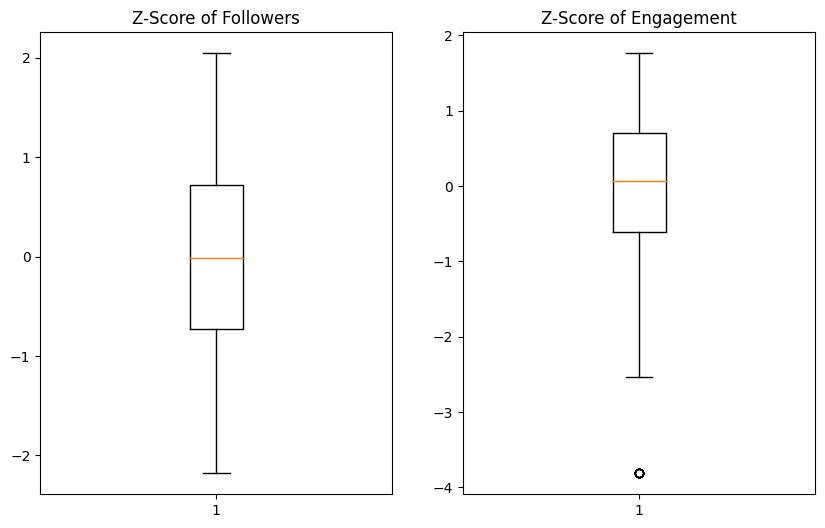

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot(data['followers_z'])
plt.title("Z-Score of Followers")

plt.subplot(1, 2, 2)
plt.boxplot(data['engagement_z'])
plt.title("Z-Score of Engagement")

plt.show()